#### Differences across the product with respect to customer characteristics.

##### Univariate 
1 Age range for each product.  
2 Marital Status wise classification of products.   
3 Gender wise classification for each product .  
4 Product wise Average fitness rank of customers.   
5 Usage of each product per week .   
6 Income range of customers for each product .   
7 is education a factor between customers of each product .   
8 Average Miles per week for each product .    


##### Bivariate.   
Relation between age and fitness rank.  
Relation between age and income.  
How usage varies with different genders.  
How usage varies with Marital Status.   
Relation with fitness and miles.    
Relation between education and usage,miles



#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
# sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [3]:
df = pd.read_csv('datasets/aerofit_treadmill_data.csv')
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
22,KP281,24,Female,16,Single,4,3,42069,94
157,KP781,26,Female,21,Single,4,3,69721,100
126,KP481,34,Male,16,Partnered,3,4,59124,85
7,KP281,21,Male,13,Single,3,3,32973,85
137,KP481,40,Male,16,Partnered,3,3,64809,95
59,KP281,33,Female,16,Single,2,2,55713,38
129,KP481,35,Male,16,Partnered,3,2,53439,53
132,KP481,37,Female,16,Partnered,2,3,48891,85
31,KP281,25,Male,16,Single,3,4,40932,113
163,KP781,28,Male,18,Partnered,7,5,77191,180


## Data Exploration and Processing

In [4]:
df.shape

(180, 9)

In [5]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


##### The DataFrame has columns of datatype `object`. Since each such column only includes predefined labels, so we can convert the datatype to `category`.  

#### Type Conversion

In [7]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [8]:
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [9]:
# Detecting Duplicates 

df.duplicated().sum() # No duplicate values in the dataset

0

In [10]:
# Detecting Null Values

df.isna().sum() # No missing value detected in the dataset

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Statistical Summary

In [11]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Observations

    • There is no missing and duplicate values in data set
    • Dataset contains 3 unique products
    • KP281 is the most frequent product 
    • Out of 180 data points, 104's gender is male rest are the females
    • Out of 180 data points, 107's Marital Status is Partnered rest are the singles
    • Age varies between 18<=Age<=50. Out of which 75% of persons having age <= 33
    

## Non-Graphical Analysis

In [12]:
df['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [13]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [14]:
df['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [15]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [16]:
df['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [17]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

### Unique values in numerical columns

In [18]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [19]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [20]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [21]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [22]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [23]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [24]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

## Graphical Analysis

### Univariate Analysis - Numerical Variables

In [25]:
numerical = ['Age', 'Education', 'Usage','Fitness', 'Income', 'Miles']

#### Histograms

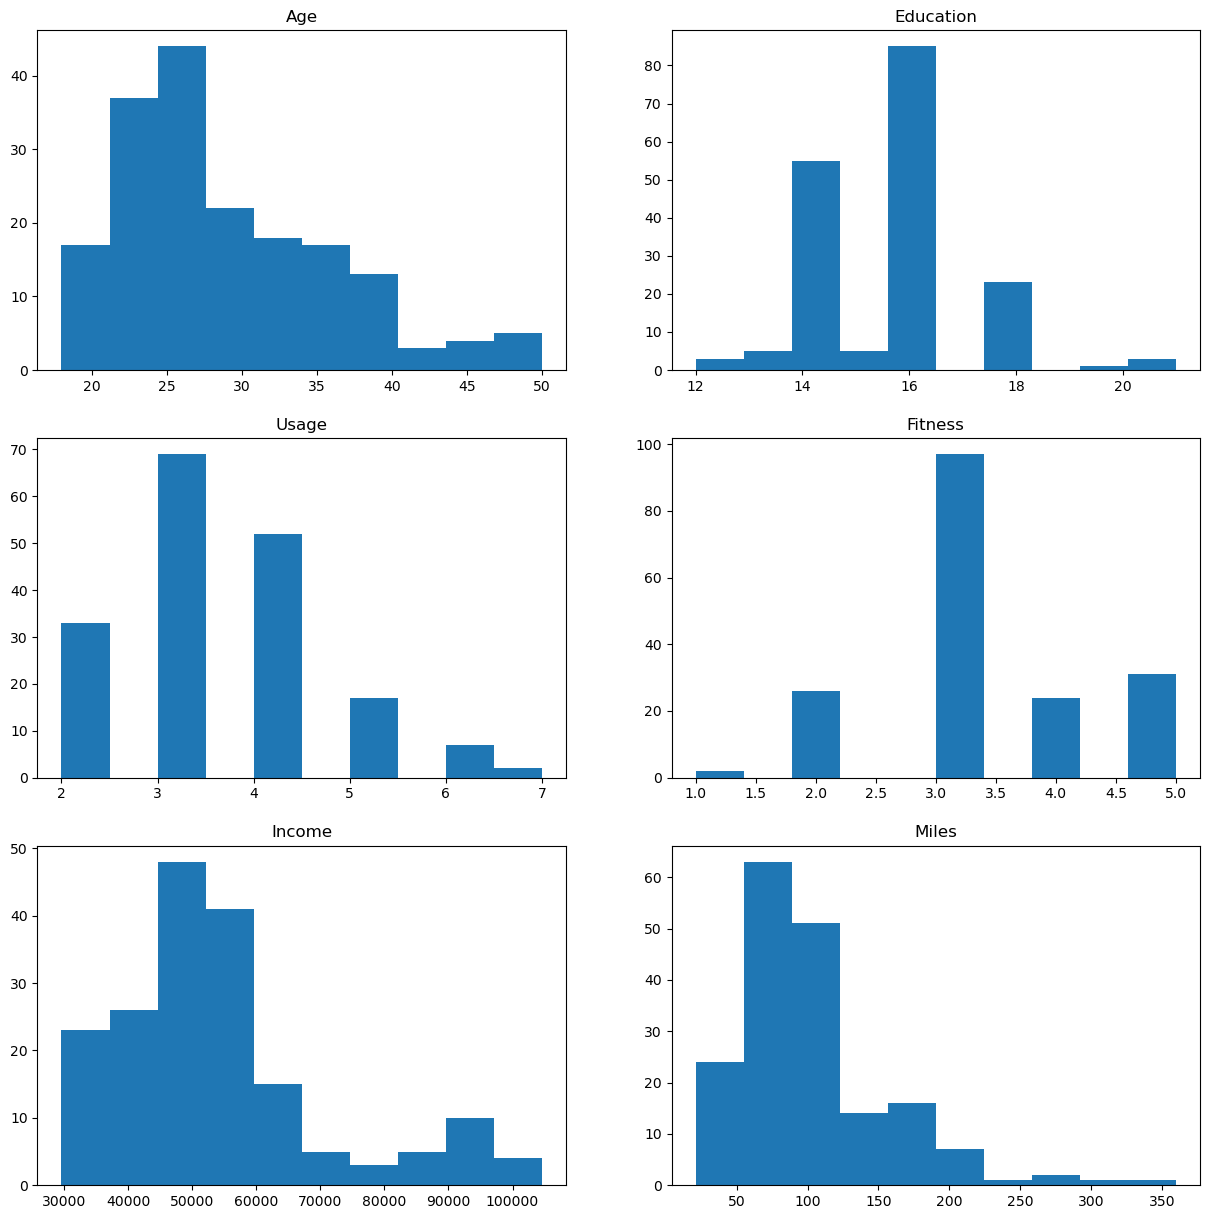

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, col in enumerate(numerical):
    r, c = divmod(i, 2)
    ax[r, c].hist(df[col])
    ax[r, c].set_title(col)
plt.show()


#### Countplots

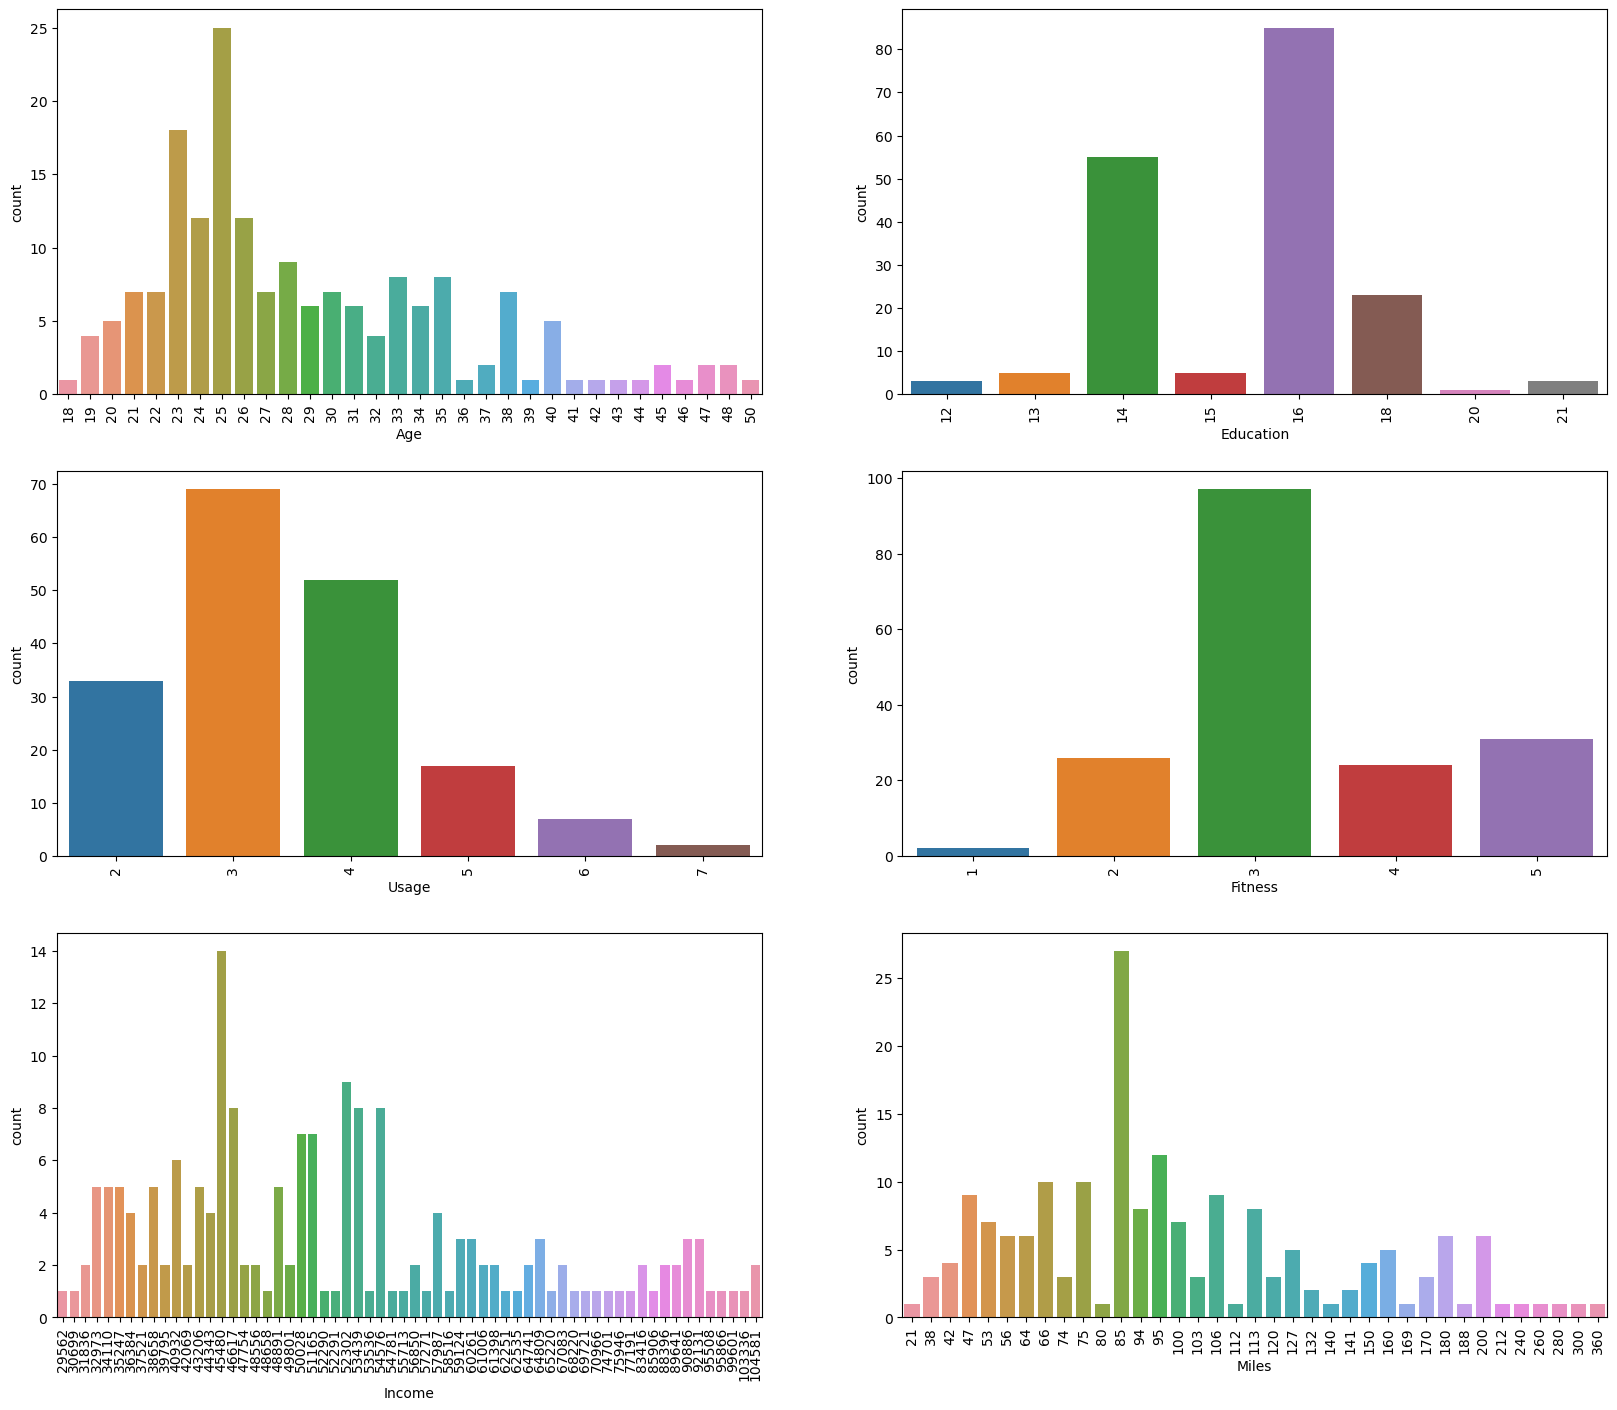

In [27]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

for i, col in enumerate(numerical):
    r, c = divmod(i, 2)
    sns.countplot(data = df, x = col, ax = axis[r, c])
    axis[r, c].set_xticklabels(axis[r, c].get_xticklabels(), rotation = 'vertical')
plt.show()

#### Boxplots

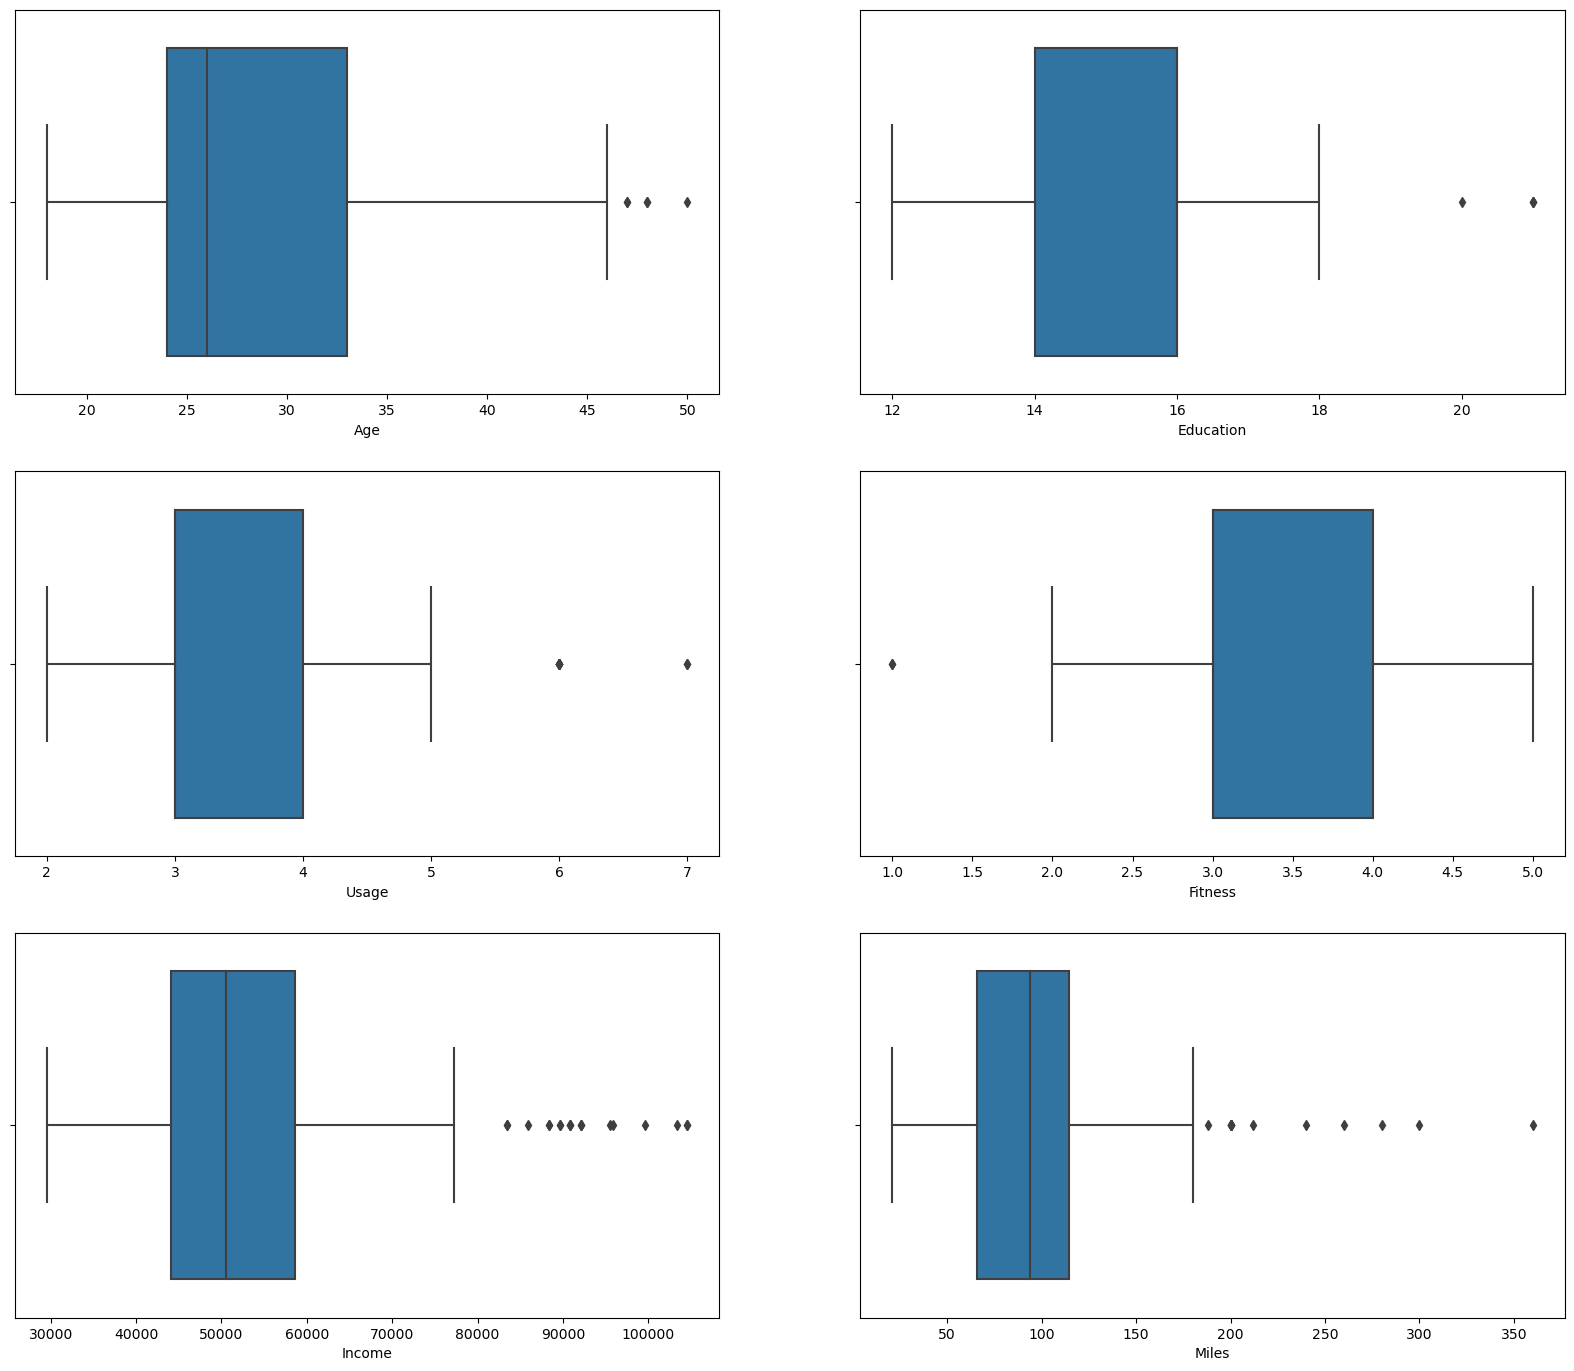

In [28]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

for i, col in enumerate(numerical):
    r, c = divmod(i, 2)
    sns.boxplot(data = df, x = col, ax = axis[r, c])
plt.show()

### `~Observations`

- `Income`, `Miles`, `Age` are positively skewed, which means mass of distribution concentrated on the left side.
- Customers of age `25` are more health conscious
- Majority customers fall between `21-35` age range
- Majority customers fall between `40k - 65k` income range
- Majority of the customers rank themselves `3` on a fitness scale of 5
- `Age`, `Education`, `Usage` have very few outliers
- Income and Miles have more potential `outliers`


### Univariate Analysis - Categorical Variables

In [29]:
categorical = ['Product', 'Gender', 'MaritalStatus']

#### Countplots

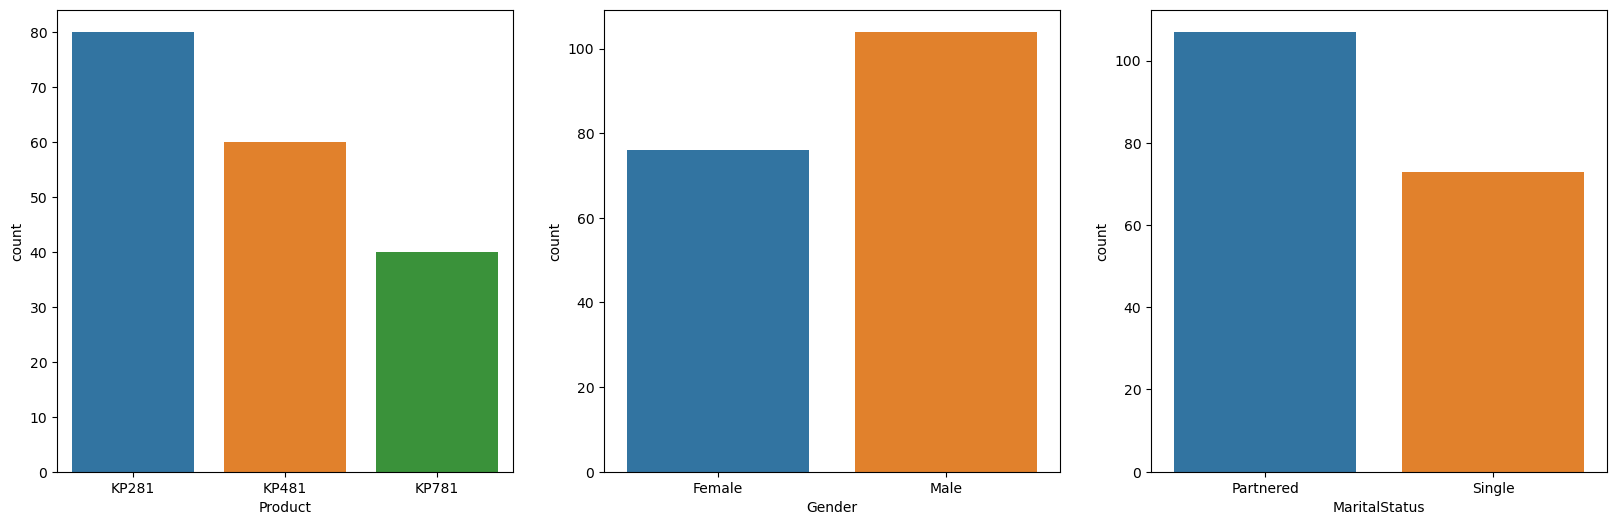

In [30]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, col in enumerate(categorical):
    sns.countplot(data = df, x = col, ax = axis[i])
plt.show()

### `~Obersevations`

- Majority of customers bought `KP281`
- `Male` customers have higher frequency as compared to `female`
- `Couples` tend to be conscious about health than `singles`

## Bivariate Analysis 

### Category - Category

In [31]:
categorical

['Product', 'Gender', 'MaritalStatus']

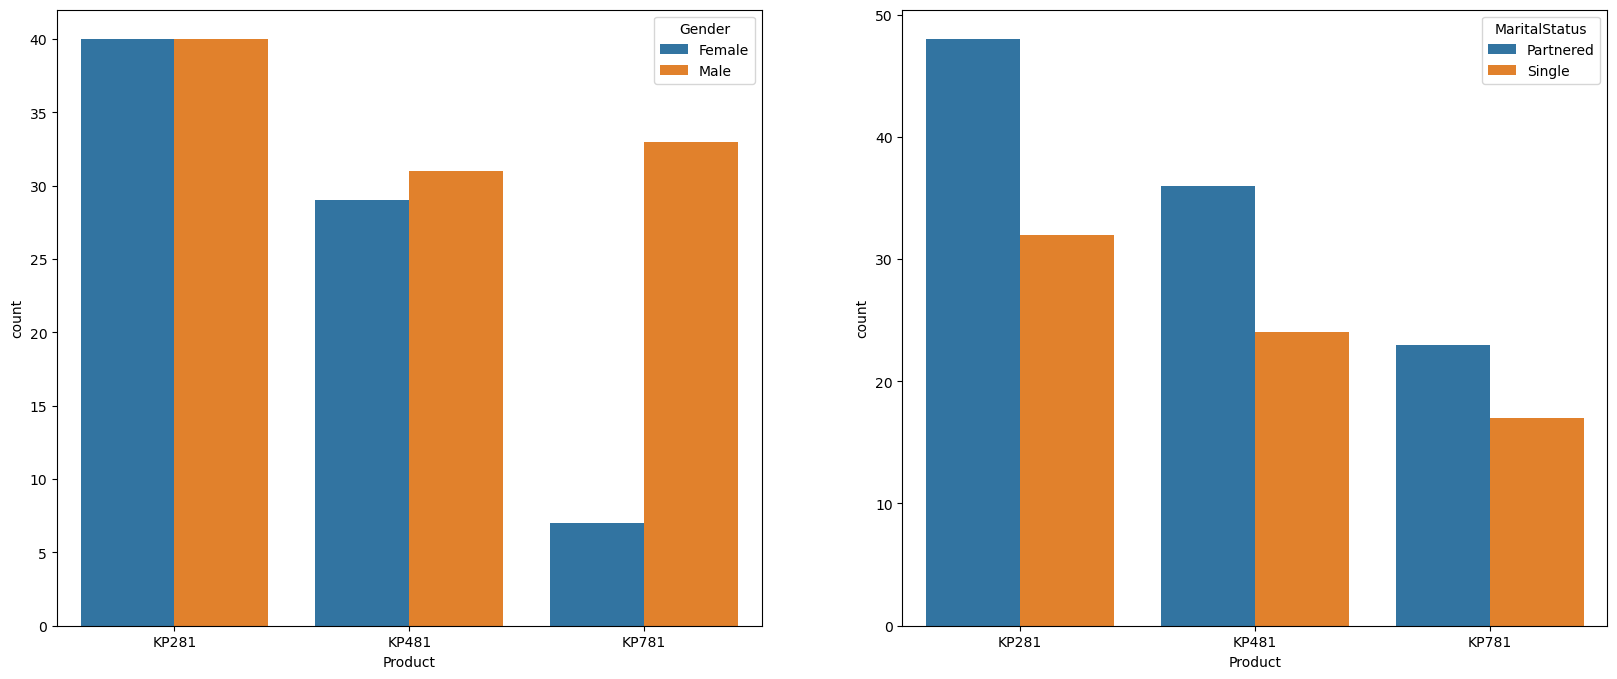

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

j = 0
for i, col in enumerate(categorical):
    if col != 'Product':
        sns.countplot(data = df, x = 'Product', ax = ax[j], hue=col)
        j += 1
plt.show()

## `~Observations`

#### Product vs Gender

- `Male` and `Female` frequency for `KP281` is same
- `Male` frequency for `KP481` is slightly high 
- For `KP781`, majority of the customers are `male`

#### Product vs Marital Status

- For each product, `Partners` are most likely to buy treadmiles

### Category - Numerical

<Axes: xlabel='Age', ylabel='count'>

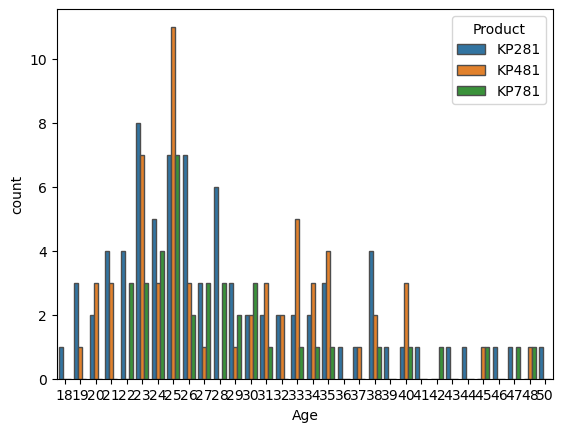

In [33]:
sns.countplot(data = df, x = 'Age', hue = 'Product', edgecolor = '0.3')

- Majority customers of `KP781` are `25` years old

In [34]:
numerical

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

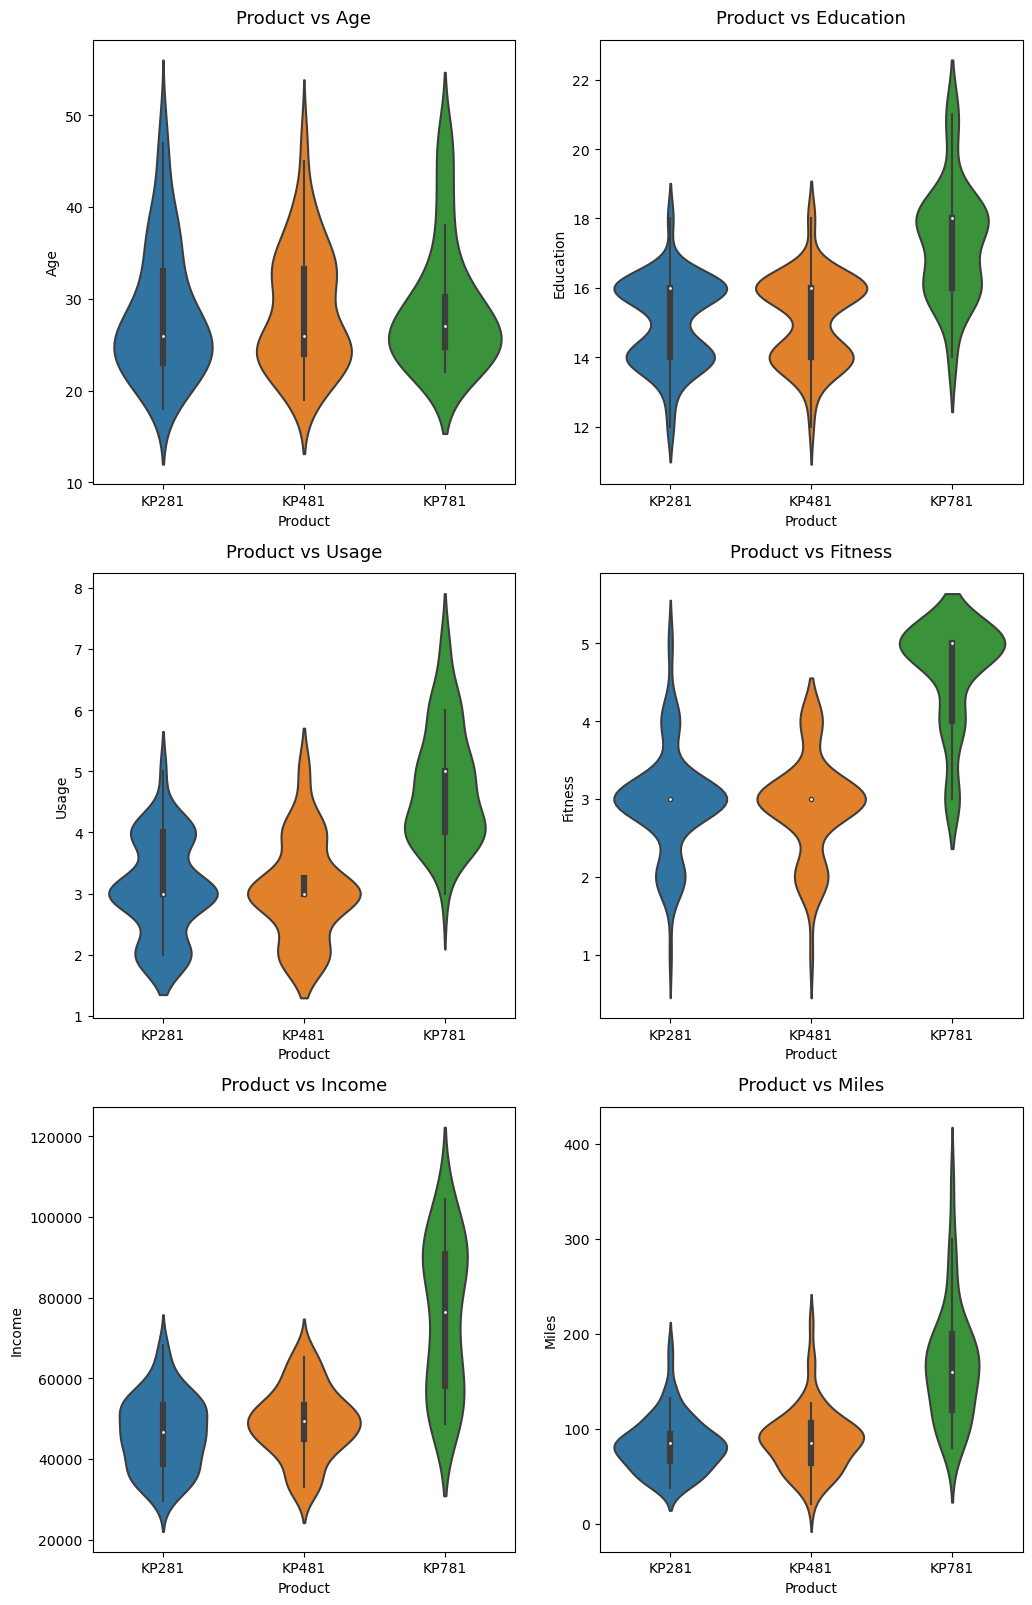

In [35]:
fig, ax = plt.subplots(3, 2, figsize= (12, 8))
fig.subplots_adjust(top=2)


for i, col in enumerate(numerical):
    r, c = divmod(i, 2)
    sns.violinplot(data = df, x = 'Product', y = col, showmeans = True, ax = ax[r, c])
    ax[r, c].set_title(f"Product vs {numerical[i]}", pad=12, fontsize=13)

plt.show()

## `~Observations`

#### Product vs Age

- Customer buying `KP281` and `KP481` have same `median` Age
- Customers whose age lies between `25-30`, tend to buy `KP781`

#### Product vs Education

- Customer having education equal to or more than `16` prefers to buy `KP781`
- Other customers prefer `KP281` and `KP481`

#### Product vs Usage

- Customers who are planning to use the treadmill greater than 4 times a week prefers to buy `KP781`
- Rest of the customers prefer `KP281` and `KP481`

#### Product vs Fitness

- Customers who have ranked themselves more than 3, more likely to buy `KP781`

#### Product vs Income 

- The higher the Income of the customer `(Income >= 60000)`, the higher the chances of the customer purchasing the `KP781` product.

#### Product vs Miles

- Customers who are planning to `run >= 120`, more likely to buy `KP781`
- Rest of the customers prefer, `KP281` and `KP481`

## Multi-variate Analysis 

In [36]:
numerical

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

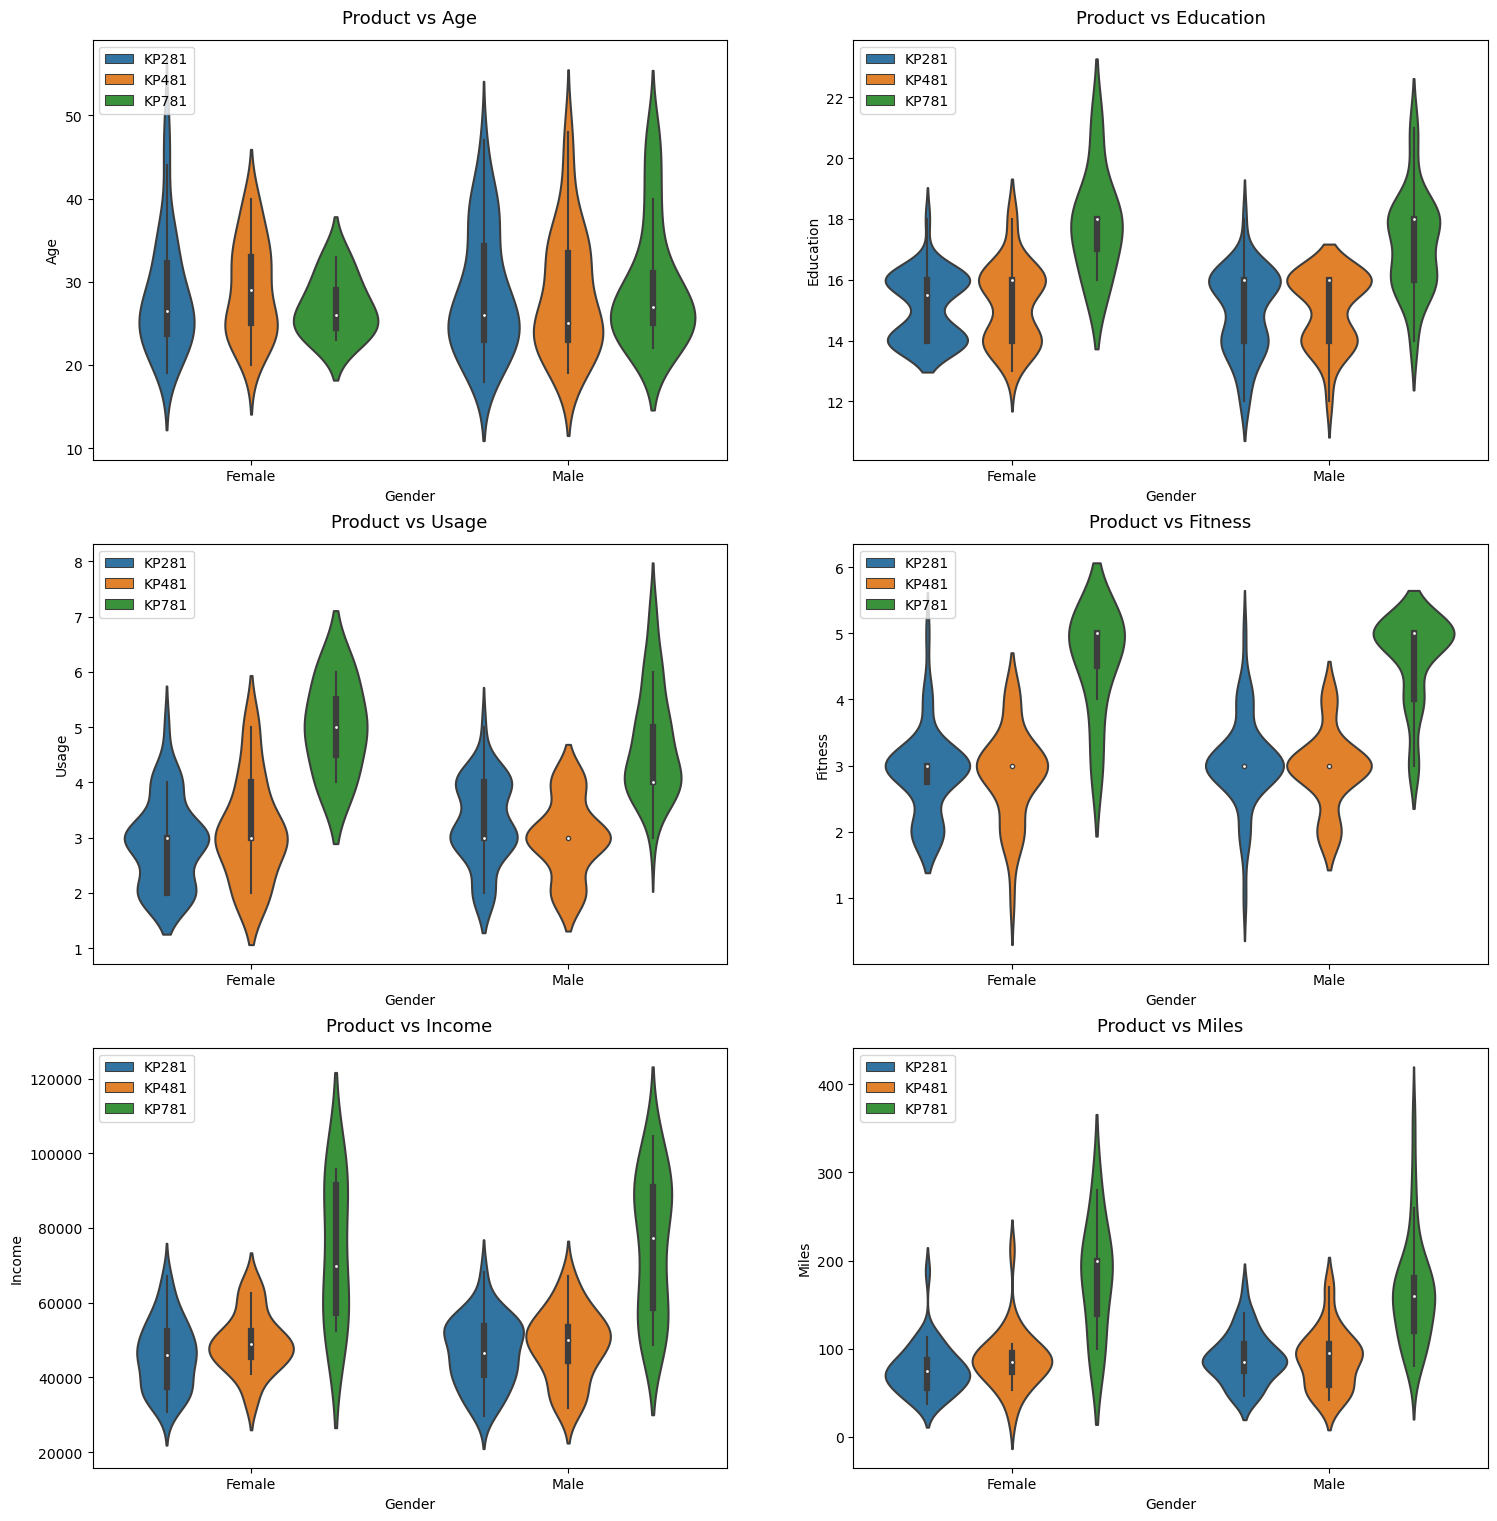

In [37]:
fig, ax = plt.subplots(3, 2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
for i, col in enumerate(numerical):
    r, c = divmod(i, 2)
    sns.violinplot(data = df, x = 'Gender', y = col, hue = 'Product', ax = ax[r, c])
    ax[r, c].set_title(f'Product vs {col}', pad=12, fontsize=13)
    ax[r, c].legend(loc = 'upper left')
plt.show()

## `~Observations`

In [38]:
df_numerical = df[numerical]

In [39]:
df_numerical.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [40]:
df_numerical.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


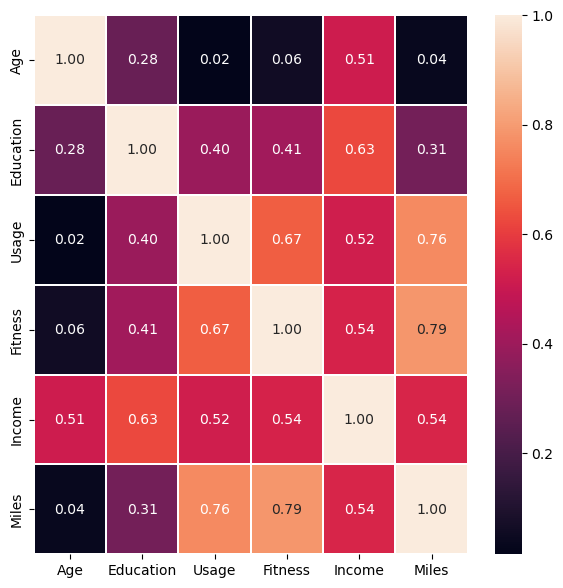

In [41]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_numerical.corr(), annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()

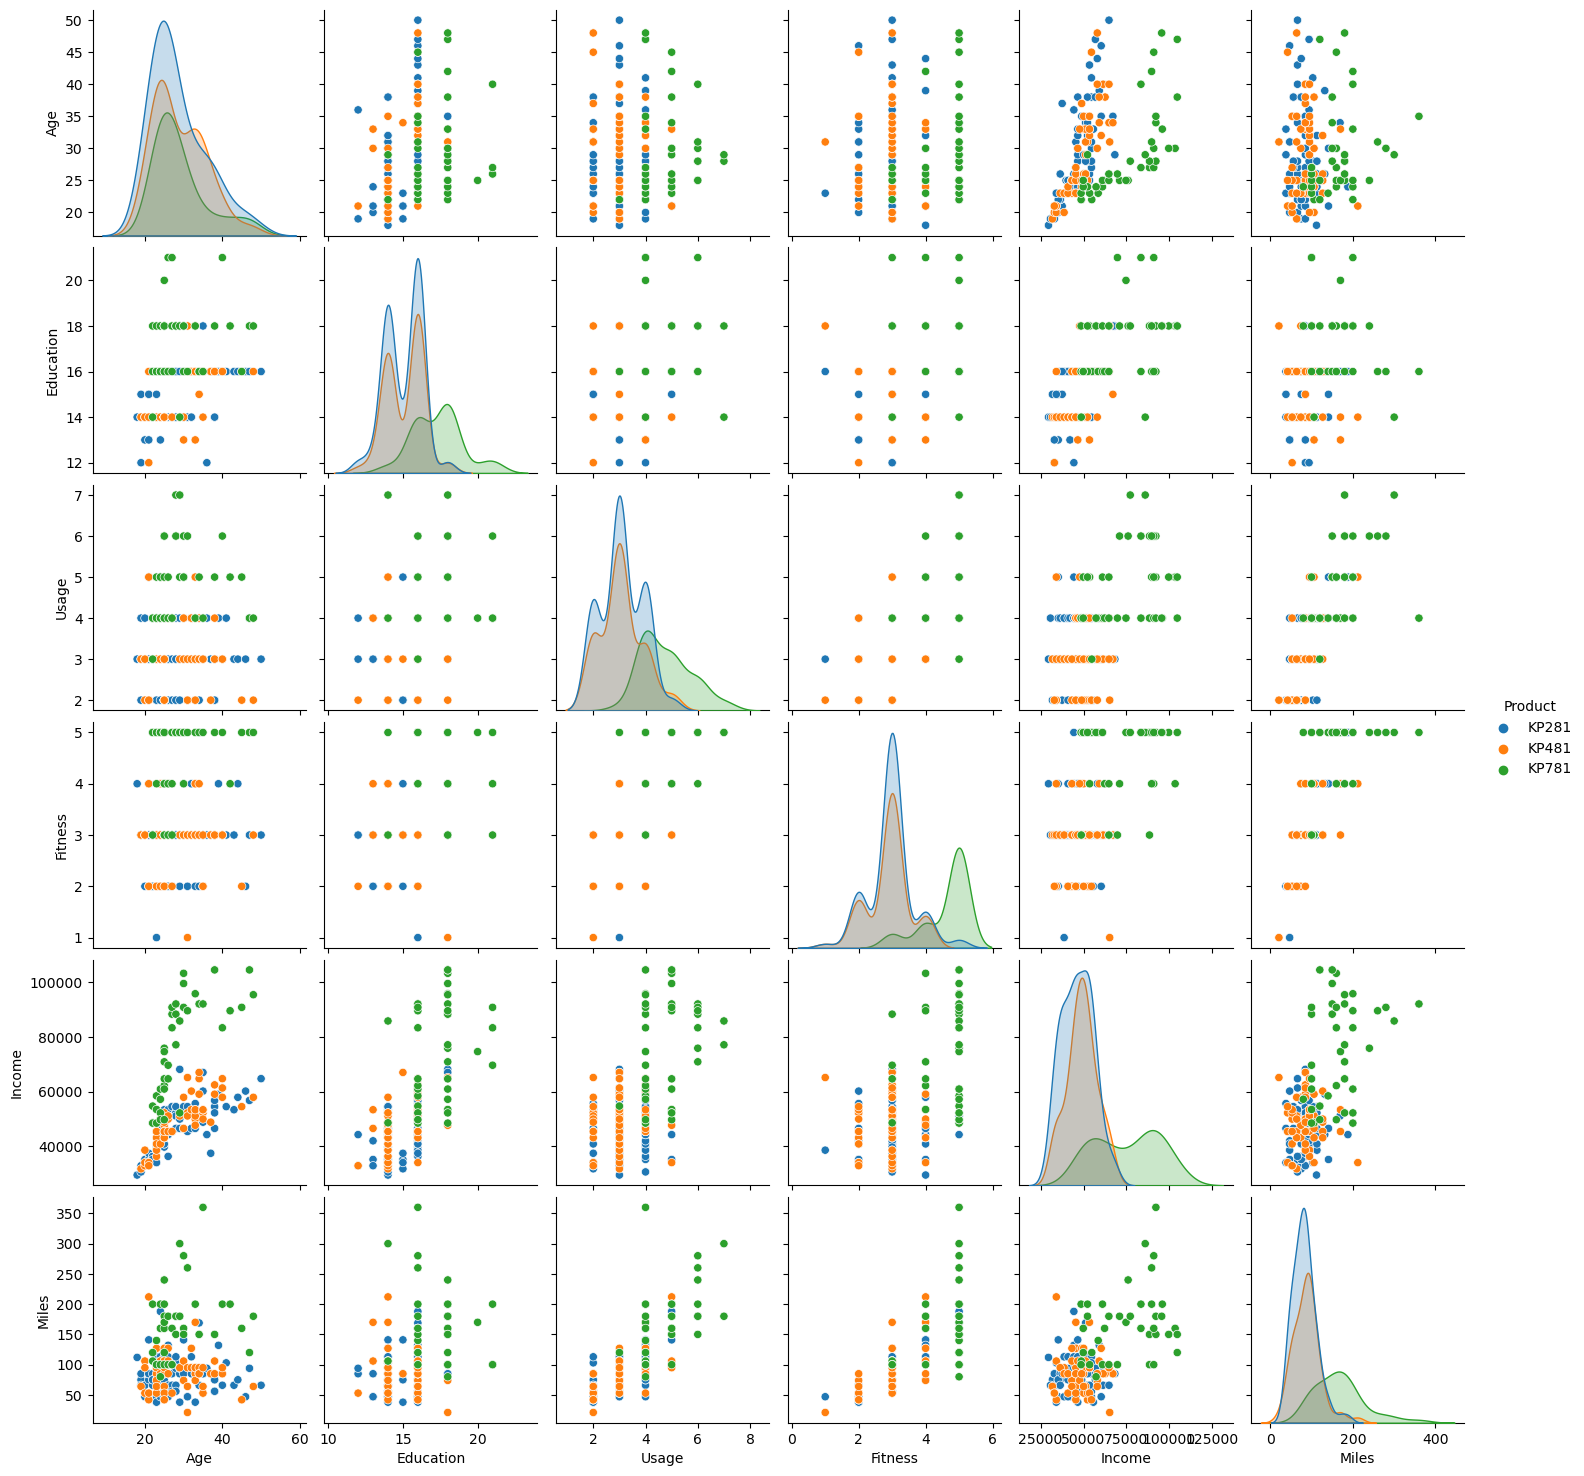

In [63]:
sns.pairplot(df, hue= 'Product')
plt.show()

# Marginal & Conditional Probabilities

In [50]:
df_category = df[categorical].melt()

In [62]:
(df_category.groupby(['variable', 'value'])[['value']].count()/len(df)*(100)).round(3).astype(str)+'%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

## Product - Gender

In [145]:
df_cross = pd.crosstab(index = df['Gender'], columns = df['Product'], margins=True)

In [146]:
df_cross

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


#### Probabilities based on `Gender`
1. Probability of Male buying a treadmill 
2. Probability of Female buying treadmill 
3. Probability of Male buying either KP281 or KP481 or KP781
4. Probability of Female buying either KP281 or KP481 or KP781
5. Probability of customer being Male or Female given that product is either KP281 or KP481 or KP781

In [128]:
def gender_prob(gender, print_status = False):
    if gender is not 'Male' and gender is not 'Female':
        return 'Invalid Gender Value'
    
    p_KP281 = df_cross['KP281'][gender] / df_cross.loc[gender].sum()
    p_KP481 = df_cross['KP481'][gender] / df_cross.loc[gender].sum()
    p_KP781 = df_cross['KP781'][gender] / df_cross.loc[gender].sum()   
    
    if print_status:
        print(f"P(Male): {df_cross.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df_cross.loc['Female'].sum()/len(df):.2f}\n")    
    
    print(f"P(KP281/{gender}): {p_KP281:.2f}")
    print(f"P(KP481/{gender}): {p_KP481:.2f}")    
    print(f"P(KP781/{gender}): {p_KP781:.2f}\n")   
    

gender_prob('Male', True)
gender_prob('Female')

P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



In [147]:
df_cross

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [149]:
# Probability of Customer being Male given than product is KP281

male_281 = df_cross['KP281']['Male']/df_cross['KP281']['All'].sum()
male_281

0.5

In [151]:
# Probability of Customer being Male given than product is KP481

male_481 = round(df_cross['KP481']['Male']/df_cross['KP481']['All'].sum(), 2)
male_481

0.52

In [152]:
# Probability of Customer being Male given than product is KP781

male_781 = round(df_cross['KP781']['Male']/df_cross['KP781']['All'].sum(), 2)
male_781

0.82

In [153]:
# Probability of Customer being female given than product is KP281

female_281 = df_cross['KP281']['Female']/df_cross['KP281']['All'].sum()
female_281

0.5

In [155]:
# Probability of Customer being female given than product is KP481

female_481 = round(df_cross['KP481']['Female']/df_cross['KP481']['All'].sum(), 2)
female_481

0.48

In [156]:
# Probability of Customer being female given than product is KP781

female_781 = round(df_cross['KP781']['Female']/df_cross['KP781']['All'].sum(), 2)
female_781

0.18

## Product - Gender

In [157]:
status_cross = pd.crosstab(index = df['Product'], columns = df['MaritalStatus'], margins = True)
status_cross

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [158]:
def status_prob(status, print_status = False):
    if status is not 'Partnered' and status is not 'Single':
        return 'Invalid Gender Value'
    
    df_cross = pd.crosstab(index = df['MaritalStatus'], columns = df['Product'])
    p_KP281 = df_cross['KP281'][status] / df_cross.loc[status].sum()
    p_KP481 = df_cross['KP481'][status] / df_cross.loc[status].sum()
    p_KP781 = df_cross['KP781'][status] / df_cross.loc[status].sum()   
    
    if print_status:
        print(f"P(Single): {df_cross.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df_cross.loc['Partnered'].sum()/len(df):.2f}\n")    
    
    print(f"P(KP281/{status}): {p_KP281:.2f}")
    print(f"P(KP481/{status}): {p_KP481:.2f}")    
    print(f"P(KP781/{status}): {p_KP781:.2f}\n")   
    

status_prob('Single', True)
status_prob('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



## Product vs Age 

### Feature Construction

In [160]:
df1 = df.copy()

In [170]:
bins = [14, 20, 30, 40, 60]
labels =["Teens","20s","30s","Above 40s"]

df1['AgeGroup'] = pd.cut(df1['Age'], bins)
df1['AgeCategory'] = pd.cut(df1['Age'], bins, labels = labels)

df1.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
17,KP281,23,Male,16,Partnered,4,3,39795,94,"(20, 30]",20s
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 60]",Above 40s
139,KP481,48,Male,16,Partnered,2,3,57987,64,"(40, 60]",Above 40s
148,KP781,24,Female,16,Single,5,5,52291,200,"(20, 30]",20s
15,KP281,23,Male,16,Partnered,3,3,40932,75,"(20, 30]",20s
52,KP281,29,Female,16,Partnered,4,3,50028,94,"(20, 30]",20s
161,KP781,27,Male,21,Partnered,4,4,90886,100,"(20, 30]",20s
60,KP281,33,Female,16,Partnered,3,3,46617,85,"(30, 40]",30s
122,KP481,33,Male,16,Partnered,3,3,51165,95,"(30, 40]",30s
146,KP781,24,Male,16,Single,4,5,61006,100,"(20, 30]",20s


#### Contingency Table

In [173]:
cross_age = pd.crosstab(index = df1['Product'], columns = df1['AgeCategory'], margins=True)
cross_age

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180
